In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("diamonds.csv" )
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71


In [13]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['cut'] = lb_make.fit_transform(data['cut'])
data[['cut', 'cut']]

lb_make1 = LabelEncoder()
data['color'] = lb_make1.fit_transform(data['color'])
data[['color', 'color']]

lb_make2 = LabelEncoder()
data['clarity'] = lb_make2.fit_transform(data['clarity'])
data[['clarity', 'clarity']]
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
15,0.32,3,1,0,60.9,58.0,345,4.38,4.42,2.68
16,0.30,2,5,3,62.0,54.0,348,4.31,4.34,2.68
17,0.30,1,6,2,63.4,54.0,351,4.23,4.29,2.70
18,0.30,1,6,2,63.8,56.0,351,4.23,4.26,2.71


In [15]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

(0, 10)

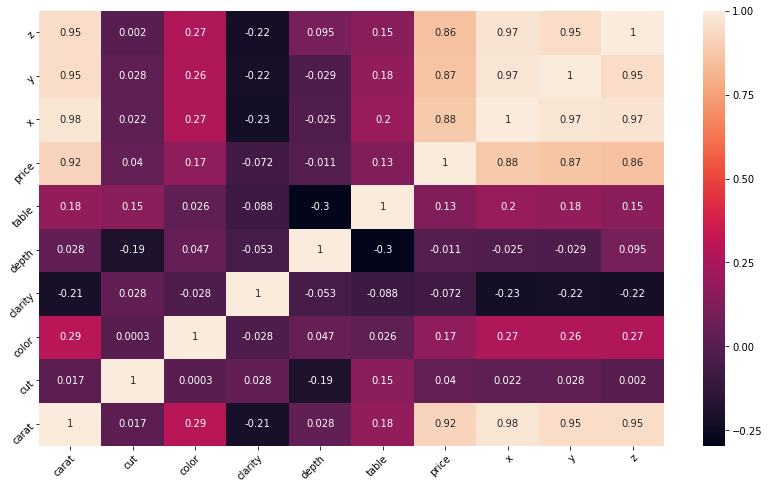

In [17]:
# Visualize data
plt.figure(figsize=(14,8))

ax = sns.heatmap(data.corr(), annot=True)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_ylim(len(data)-53940,10)

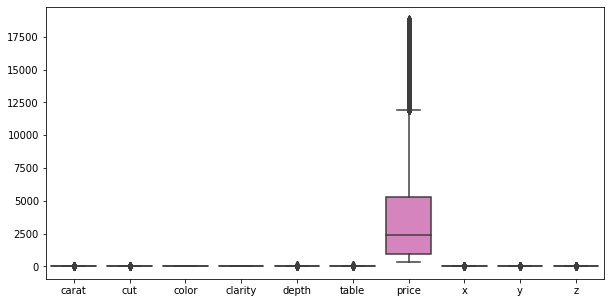

In [18]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data)

In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

carat         0.64
cut           1.00
color         3.00
clarity       3.00
depth         1.50
table         3.00
price      4374.25
x             1.83
y             1.82
z             1.13
dtype: float64


In [23]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Shape of data after removing outlier', data_out.shape)
print('Shape of data before removing outlier', data.shape)

Shape of data after removing outlier (47194, 10)
Shape of data before removing outlier (53940, 10)


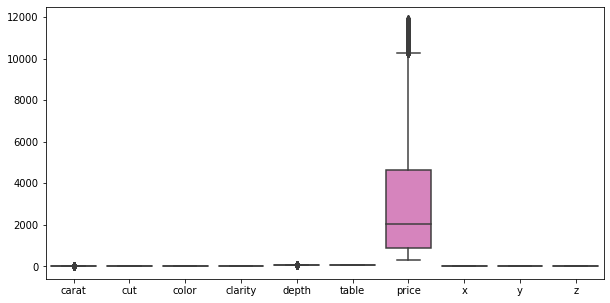

In [24]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data_out)

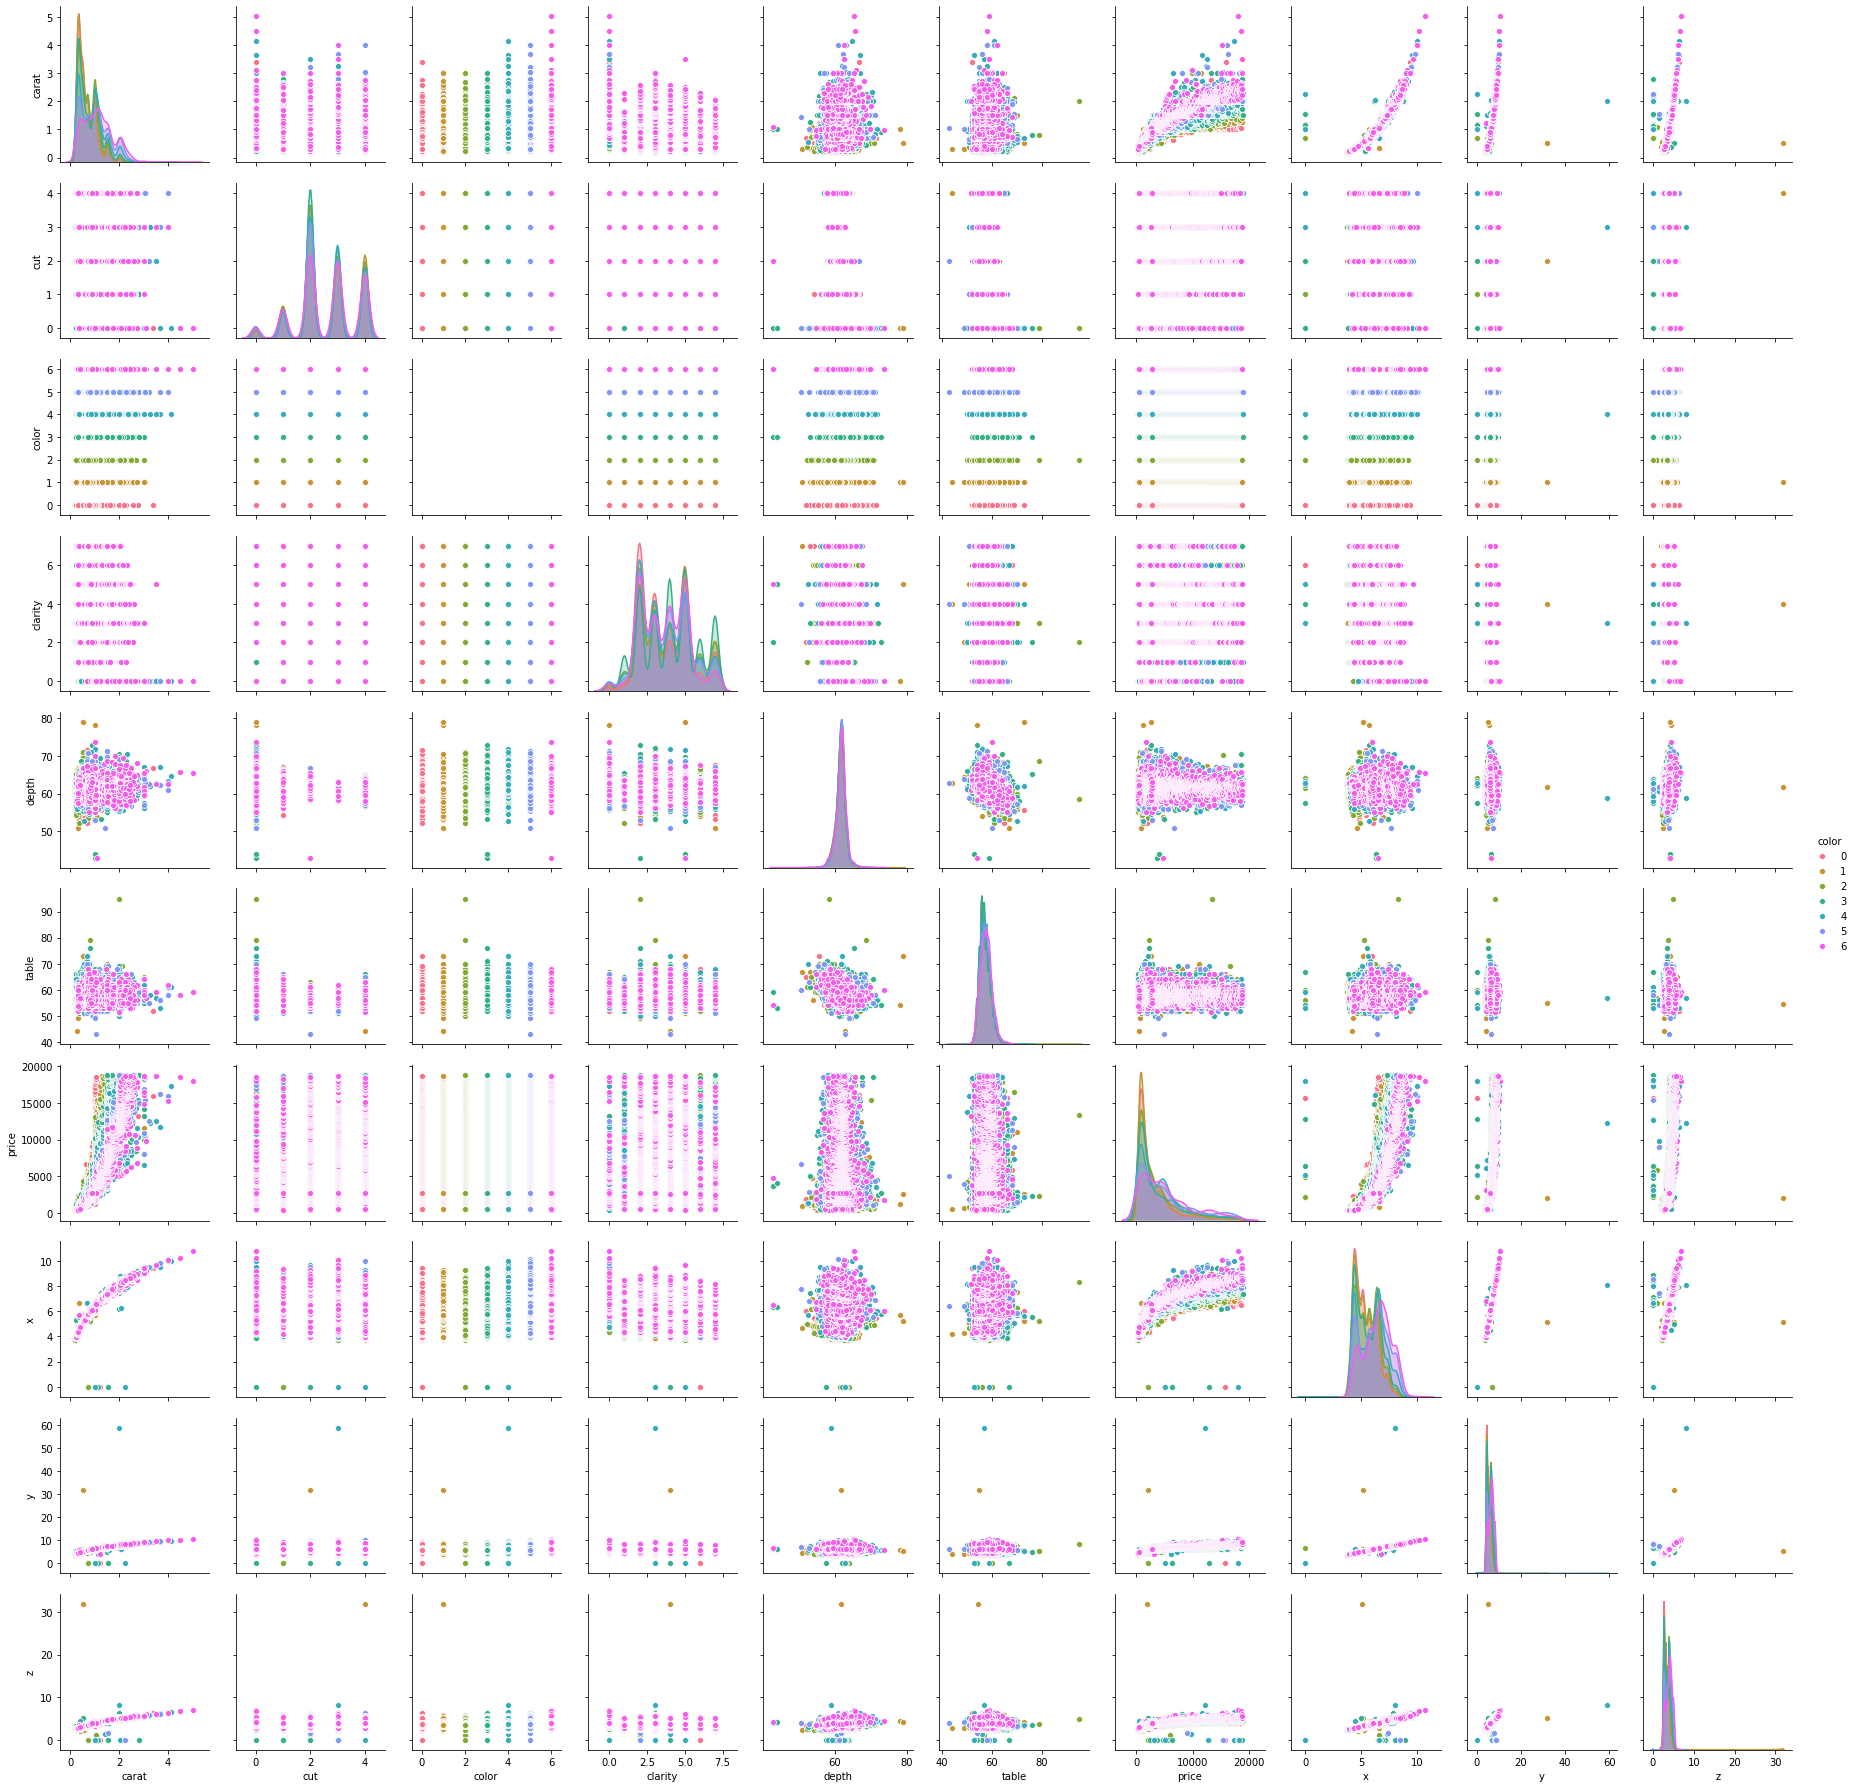

In [26]:
 g = sns.pairplot(data, hue="color", palette="husl")

In [30]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
py.init_notebook_mode(connected=True)

fig = px.histogram(data, x="price")
fig.show()

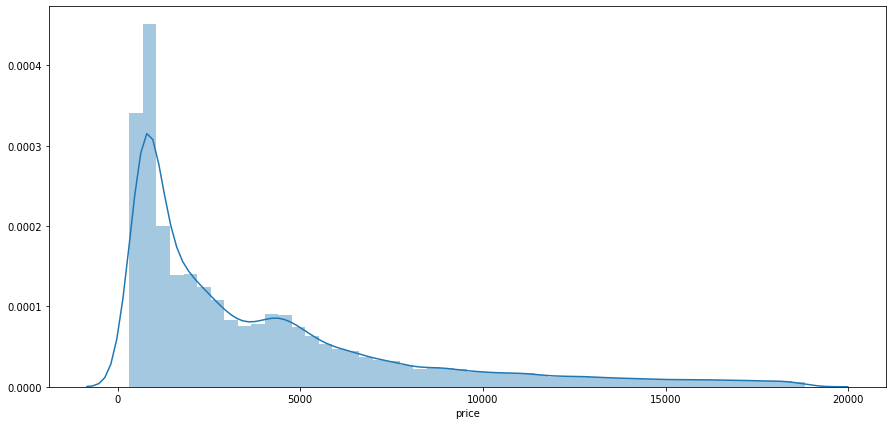

In [36]:
plt.figure(figsize=(15, 7))
sns.distplot(data['price'], kde=True)

In [39]:
# Import libraries

from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [40]:
X =  data.drop('price', axis = 1)
Y = data.price
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.25,random_state=0)

In [42]:
print(X.shape)
print(Y.shape)

(53940, 9)
(53940,)


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [64]:
knn = KNeighborsRegressor(n_neighbors = 2, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn regressor on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn regressor on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn regressor on training data is 0.99
The accuracy of the Knn regressor on test data is 0.96
